<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di un caso reale**:  Telco customer churn

Imposta e realizza un modello predittivo per calcolare il tasso d'abbandono di ciascun cliente usando i dati a disposizione *Telco_customer_churn.csv*,
seguendo i seguenti passi:

- Definire il tipo di problema di apprendimento 
- EDA
- Data preprocessing
- Data Modeling
- Optimization hyperparameter
- Model Evaluation
- Aggiungi delle conclusioni da portare a un ipotetico cliente (che non sa nulla di data science) per convincerlo che il tuo modello predittivo è valido. Inoltre porta qualche esempio di come ne può beneficiare il suo business

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Esercizio extra facoltativo:

Come puoi salvare il modello per riutilizzarlo?



In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', 500)
np.set_printoptions(precision=7, suppress=True)

# EDA

In [32]:
df = pd.read_csv("Telco_customer_churn.csv")

In [33]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [34]:
df["Churn Value"].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [35]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


### Definire il tipo di problema di apprendimento 

tasso di abbandono di ciascun cliente: regressione
- dopo quanto tempo abbandona?

In [36]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [37]:
df["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [38]:
df["Country"].unique()

array(['United States'], dtype=object)

In [39]:
df.drop(columns=["Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude", "Senior Citizen", "Partner", "Dependents", "Paperless Billing", "Payment Method", "Churn Label", "Churn Score"], inplace= True)

In [40]:
df.head()

,CustomerID,Gender,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason
0,3668-QPYBK,Male,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1,3239,Competitor made better offer
1,9237-HQITU,Female,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,1,2701,Moved
2,9305-CDSKC,Female,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,1,5372,Moved
3,7892-POOKP,Female,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,1,5003,Moved
4,0280-XJGEX,Male,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,103.70,5036.3,1,5340,Competitor had better devices


# data preprocessing

In [41]:
df.drop(df[df["Total Charges"] == ' '].index, inplace= True)
df.reset_index(inplace= True)

In [42]:
cat = ["Gender", "Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup", "Tech Support", "Streaming TV", "Streaming Movies", "Contract", "Churn Reason"]
num = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]

In [43]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
X_cat = ohe.fit_transform(df[cat].values)

In [44]:
X = np.concatenate([df[num], X_cat], axis=1)
y = np.array(df["Churn Value"])

feature_names = num + ohe.get_feature_names_out(cat).tolist()

print(X.shape, y.shape)
print(feature_names) 

(7032, 51) (7032,)
['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Gender_Male', 'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_No phone service', 'Multiple Lines_Yes', 'Internet Service_DSL', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No', 'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No', 'Online Backup_No internet service', 'Online Backup_Yes', 'Tech Support_No', 'Tech Support_No internet service', 'Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_No internet service', 'Streaming TV_Yes', 'Streaming Movies_No', 'Streaming Movies_No internet service', 'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Churn Reason_Attitude of service provider', 'Churn Reason_Attitude of support person', 'Churn Reason_Competitor had better devices', 'Churn Reason_Competitor made better offer', 'Churn Reason_Competitor offered higher download speeds', 'Churn Reason_Competi

## splitting

In [45]:
#split train-test
rnd = 10
splitter = StratifiedShuffleSplit(random_state= rnd, test_size= 0.2, n_splits= 1)

train_idx, test_idx = next(splitter.split(X, y))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

X_train.shape, X_test.shape


((5625, 51), (1407, 51))

In [46]:
#split train-validation
splitter_val = StratifiedShuffleSplit(random_state= rnd, test_size= 0.2, n_splits= 1)

train_idx, val_idx = next(splitter_val.split(X_train, y_train))

X_val, y_val = X_train[val_idx], y_train[val_idx]
X_train, y_train = X_train[train_idx], y_train[train_idx]

X_train.shape, X_val.shape, X_test.shape


((4500, 51), (1125, 51), (1407, 51))

# Modeling

Bisogna calcolare il tasso di abbandono dei clienti, e in funzione di questo stabilire se il cliente è portato ad abbandonare l'azienda o meno. Il modello che meglio si adatta per questo tipo di lavoro è la regressione logistica (prima determina una % e poi divide il risultato in classi)

In [47]:
X_train[0,:]

array([9, 59.5, '530.05', 4011, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
      dtype=object)

In [48]:
#normalizzazione dati
X_num = MinMaxScaler().fit_transform(X_train[:,0:3])
X_train[:,0:3] = X_num

In [49]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = logr.predict(X_val)

In [51]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logr.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logr.score(X_val, y_val)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_val, y_pred)))


Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on validation set: 0.79
Precision of logistic regression classifier on test set: 0.93


<Axes: >

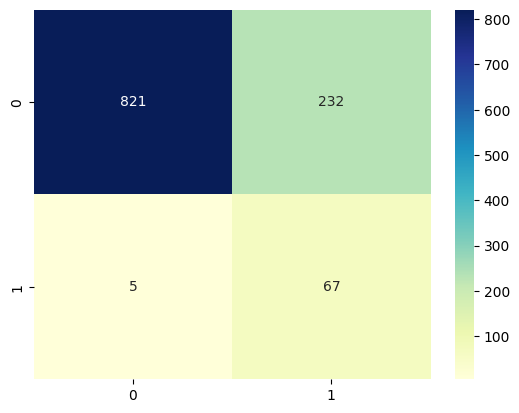

In [52]:
cm = confusion_matrix(y_pred, y_val)
sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu")

In [53]:
# Regressione logistica istanziata 
logrCV = LogisticRegressionCV()

# Training del modello
logrCV.fit(X_train, y_train)

y_pred = logr.predict(X_val)

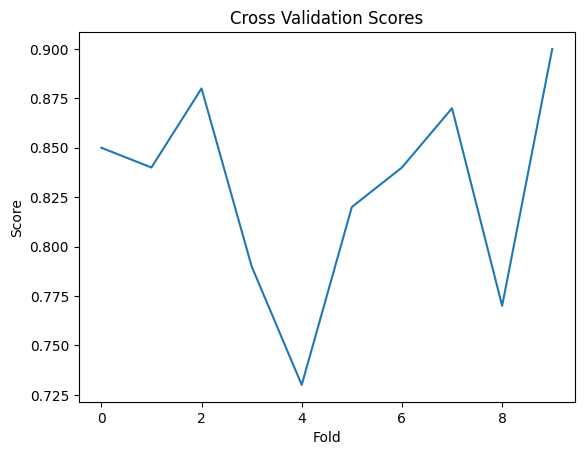

In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

# Generiamo un dataset fittizio per l'esempio
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=0,
                           random_state=42)

# Creiamo un modello di Regressione Logistica
model = LogisticRegression()

# Creiamo uno scalatore standard e una pipeline per il nostro modello
pipe = Pipeline([('scaler', MinMaxScaler()), ('model', logrCV)])

# Definiamo la strategia di Cross Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcoliamo le performance del nostro modello tramite Cross Validation
scores = cross_val_score(pipe, X, y, cv=cv_strategy)

# Visualizziamo i risultati della Cross Validation
plt.plot(scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')
plt.show()
